In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('../data/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='iso-8859-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [4]:
possible_numeric_candidates = ['SDT_M_mg/L', 'N_NO3_mg/L', 'DUR_mg/L']
df[possible_numeric_candidates].isna().sum()

SDT_M_mg/L    2
N_NO3_mg/L    1
DUR_mg/L      1
dtype: int64

In [5]:
df = df[df['SDT_M_mg/L'] != '<25']
df = df[df['DUR_mg/L'] != '<20']
df['N_NO3_mg/L'].replace('<0.02', 0, inplace=True)
df['FLUORUROS_mg/L'].replace('<0.2')

df.dropna(subset=possible_numeric_candidates, inplace=True)

df = df.astype({'SDT_M_mg/L':'float32', 'N_NO3_mg/L':'float32', 'DUR_mg/L':'float32'})
df[possible_numeric_candidates].dtypes


SDT_M_mg/L    float32
N_NO3_mg/L    float32
DUR_mg/L      float32
dtype: object

In [6]:
numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.head()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,DUR_mg/L,N_NO3_mg/L
0,-102.02210,22.20887,2020,229.990,940.0,NaN,603.599976,213.731995,4.184656
1,-102.20075,21.99958,2020,231.990,608.0,NaN,445.399994,185.051407,5.750110
2,-102.28801,22.36685,2020,204.920,532.0,NaN,342.000000,120.719002,1.449803
3,-102.29449,22.18435,2020,327.000,686.0,NaN,478.600006,199.878998,1.258597
4,-110.24480,23.45138,2020,309.885,1841.0,NaN,1179.000000,476.987213,15.672251


In [7]:
df_numeric.isna().sum()

LONGITUD            0
LATITUD             0
PERIODO             0
ALC_mg/L            3
CONDUCT_mS/cm       6
SDT_mg/L         1038
SDT_M_mg/L          0
DUR_mg/L            0
N_NO3_mg/L          0
dtype: int64

In [8]:
df_numeric.drop(columns=['SDT_mg/L', 'PERIODO'], inplace=True)
df_numeric.isna().sum()

/Users/luisbaduy97/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


LONGITUD         0
LATITUD          0
ALC_mg/L         3
CONDUCT_mS/cm    6
SDT_M_mg/L       0
DUR_mg/L         0
N_NO3_mg/L       0
dtype: int64

In [9]:
df_numeric.dropna(inplace=True)
df_numeric.describe()

/var/folders/dn/ccn_flld65n7y74k_zx7g5880000gn/T/ipykernel_55164/446205042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,DUR_mg/L,N_NO3_mg/L
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,-101.792651,23.123511,233.815209,1151.697473,906.500061,357.908508,4.375707
std,6.743235,3.872955,109.932567,1261.181043,2798.165527,361.593567,8.453892
min,-116.664250,14.561150,26.640000,110.000000,101.199997,21.940599,0.000000
25%,-105.355883,20.201480,165.000000,506.000000,339.000000,127.487999,0.667926
50%,-102.152250,22.587240,215.830000,824.000000,556.000000,257.295990,2.105194
75%,-98.949320,25.504700,291.720000,1337.000000,925.599976,464.618286,5.249500
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,3810.692139,121.007812


<AxesSubplot:xlabel='ALC_mg/L'>

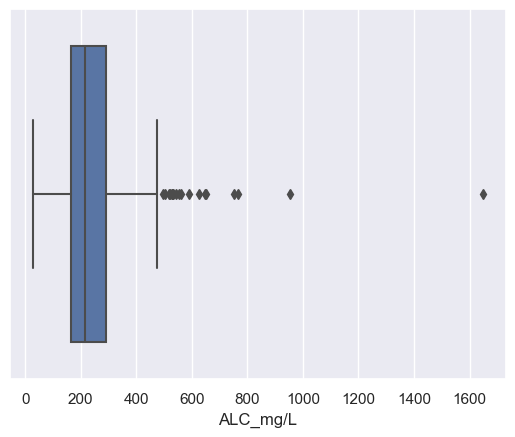

In [10]:
sns.boxplot(x=df_numeric['ALC_mg/L'])

In [11]:
quantile_ALC_3 = df['ALC_mg/L'].quantile(0.75)
outliers = (df['ALC_mg/L'] > quantile_ALC_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 259


<AxesSubplot:xlabel='CONDUCT_mS/cm'>

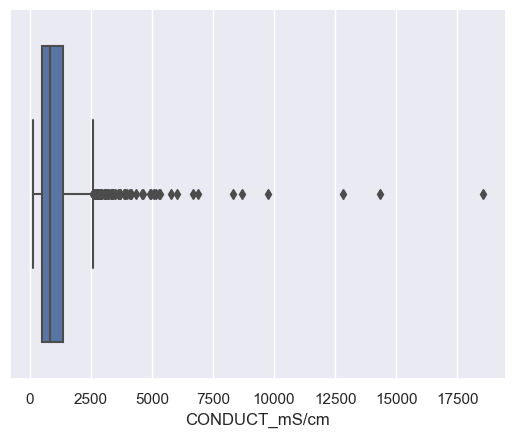

In [12]:
sns.boxplot(x=df_numeric['CONDUCT_mS/cm'])

In [13]:
quantile_CONDUCT_3 = df_numeric['CONDUCT_mS/cm'].quantile(0.75)
outliers = (df_numeric['CONDUCT_mS/cm'] > quantile_CONDUCT_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='SDT_M_mg/L'>

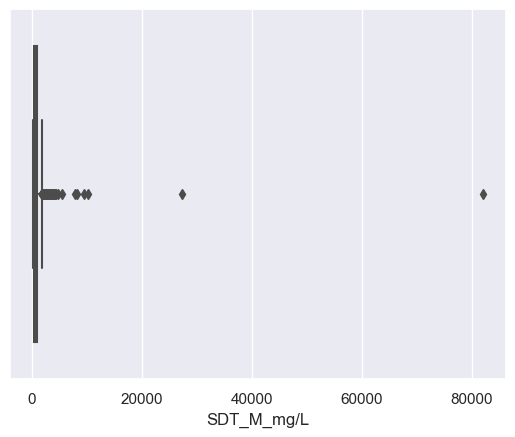

In [14]:
sns.boxplot(x=df_numeric['SDT_M_mg/L'])

In [15]:
quantile_SDT_M_mg_3 = df_numeric['SDT_M_mg/L'].quantile(0.75)
outliers = (df_numeric['SDT_M_mg/L'] > quantile_SDT_M_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='DUR_mg/L'>

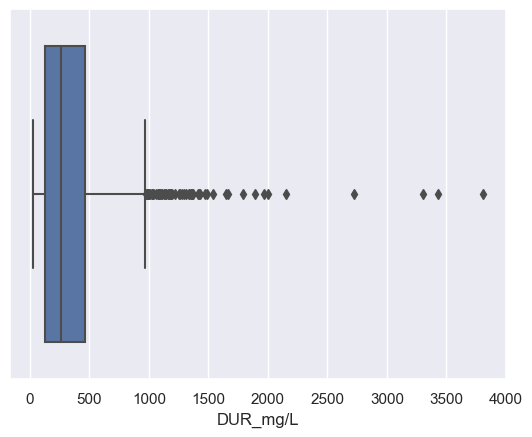

In [16]:
sns.boxplot(x=df_numeric['DUR_mg/L'])

In [17]:
quantile_DUR_mg_3 = df_numeric['DUR_mg/L'].quantile(0.75)
outliers = (df_numeric['DUR_mg/L'] > quantile_DUR_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:xlabel='N_NO3_mg/L'>

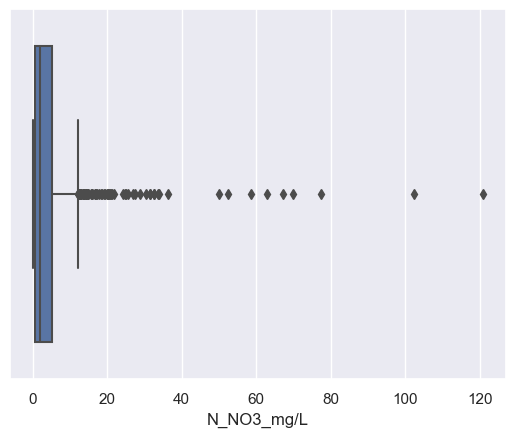

In [18]:
sns.boxplot(x=df_numeric['N_NO3_mg/L'])

In [19]:
quantile_N_NO3_mg_3 = df_numeric['N_NO3_mg/L'].quantile(0.75)
outliers = (df_numeric['N_NO3_mg/L'] > quantile_N_NO3_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 257


<AxesSubplot:>

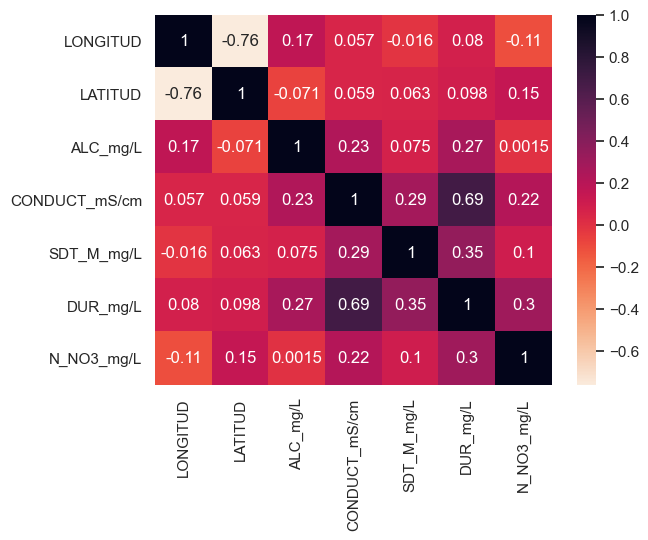

In [20]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='rocket_r')

In [23]:
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   3
CALIDAD_ALC                3
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1038
SDT_M_mg/L                 0
CALIDAD_SDT_ra             0
CALIDAD_SDT_salin          0
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   0
CALIDAD_DUR                0
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 0
CALIDAD_N_NO3              0
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   